In [1]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)
import seaborn as sns

Data Source
1. [NYC TLC](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)
    - Yellow 2016 December
2. [NYC TLC](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)
    - Yellow 2015 December
    
Code Refrences
- [Taxi Strategy](https://github.com/samuelklee/taxi-strategy)

In [28]:
# tripDf = pd.read_csv('yellow_tripdata_2016-12.csv', nrows=100000)
tripDf = pd.read_csv('yellow_tripdata_2016-12.csv', nrows=100000, usecols=range(0,17))

In [29]:
print len(tripDf.columns)
tripDf.head()

17


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2016-12-31 15:15:01   2016-12-31 15:15:09                1   
1         1  2016-12-01 00:00:01   2016-12-01 00:10:22                1   
2         1  2016-12-01 00:00:01   2016-12-01 00:11:01                1   
3         2  2016-12-01 00:00:02   2016-12-01 00:09:17                6   
4         2  2016-12-01 00:00:02   2016-12-01 00:15:20                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00           1                  N           264           264   
1           1.60           1                  N           163           143   
2           1.40           1                  N           164           229   
3           1.69           1                  N           246           107   
4           1.88           1                  N           161           162   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          1.0    0.0      0.5        0.00           0.0   
1             2          9.0    0.5      0.5        0.00           0.0   
2             1          9.0    0.5      0.5        2.05           0.0   
3             1          8.5    0.5      0.5        2.45           0.0   
4             1         10.5    0.5      0.5        2.95           0.0   

   improvement_surcharge  total_amount  
0                    0.3          1.80  
1                    0.3         10.30  
2                    0.3         12.35  
3                    0.3         12.25  
4                    0.3         14.75

In [34]:
tripDf.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  100000.000000    100000.000000  100000.000000  100000.000000   
mean        1.534170         1.688080       2.816452       1.027230   
std         0.498834         1.277311       3.266767       0.265272   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.030000       1.000000   
50%         2.000000         1.000000       1.750000       1.000000   
75%         2.000000         2.000000       3.200000       1.000000   
max         2.000000         8.000000      64.890000       6.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      160.956120     157.442760       1.315800      12.808481   
std        66.109491      73.031908       0.481158       9.833531   
min         1.000000       1.000000       1.000000    -123.000000   
25%       113.000000      97.000000       1.000000       7.000000   
50%       161.000000     161.000000       1.000000      10.000000   
75%       231.000000     233.000000       2.000000      15.000000   
max       265.000000     265.000000       4.000000     350.000000   

               extra       mta_tax     tip_amount   tolls_amount  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean        0.517615       0.49820       1.856390       0.196189   
std         0.165189       0.03289       2.261572       1.104020   
min        -1.000000      -0.50000       0.000000       0.000000   
25%         0.500000       0.50000       0.000000       0.000000   
50%         0.500000       0.50000       1.500000       0.000000   
75%         0.500000       0.50000       2.560000       0.000000   
max         4.500000       0.50000      70.000000      36.040000   

       improvement_surcharge   total_amount  
count          100000.000000  100000.000000  
mean                0.299724      16.179009  
std                 0.012366      11.850111  
min                -0.300000    -123.300000  
25%                 0.300000       9.300000  
50%                 0.300000      12.800000  
75%                 0.300000      18.500000  
max                 0.300000     350.800000

In [7]:
tripDf2 = pd.read_csv('yellow_tripdata_2015-12.csv', nrows=100000)

In [31]:
print len(tripDf2.columns)
tripDf2.head()

19


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-12-01 00:00:00   2015-12-01 00:05:16                5   
1         2  2015-12-01 00:00:00   2015-12-01 00:00:00                2   
2         2  2015-12-01 00:00:00   2015-12-01 00:00:00                1   
3         1  2015-12-01 00:00:01   2015-12-01 00:05:56                1   
4         1  2015-12-01 00:00:01   2015-12-01 00:09:28                2   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           0.96        -73.979942        40.765381           1   
1           2.69        -73.972336        40.762379           1   
2           2.62        -73.968849        40.764530           1   
3           1.20        -73.993935        40.741684           1   
4           3.00        -73.988922        40.726990           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.966309         40.763088             1   
1                  N         -73.993629         40.745998             1   
2                  N         -73.974548         40.791641             1   
3                  N         -73.997665         40.747467             1   
4                  N         -73.975594         40.696869             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          5.5    0.5      0.5        1.00           0.0   
1         21.5    0.0      0.5        3.34           0.0   
2         17.0    0.0      0.5        3.56           0.0   
3          6.5    0.5      0.5        0.20           0.0   
4         11.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3          7.80  
1                    0.3         25.64  
2                    0.3         21.36  
3                    0.3          8.00  
4                    0.3         12.30

In [32]:
tripDf2.describe()

VendorID  passenger_count  trip_distance  pickup_longitude  \
count  100000.000000    100000.000000  100000.000000     100000.000000   
mean        1.528430         1.704210       2.827327        -72.875803   
std         0.499194         1.304138       3.370212          8.950561   
min         1.000000         0.000000       0.000000        -77.047104   
25%         1.000000         1.000000       1.030000        -73.992464   
50%         2.000000         1.000000       1.710000        -73.982414   
75%         2.000000         2.000000       3.100000        -73.969246   
max         2.000000         6.000000      91.200000          0.000000   

       pickup_latitude     RatecodeID  dropoff_longitude  dropoff_latitude  \
count    100000.000000  100000.000000      100000.000000     100000.000000   
mean         40.143712       1.028550         -72.926800         40.172130   
std           4.930469       0.395748           8.749564          4.819822   
min           0.000000       1.000000         -74.624863          0.000000   
25%          40.734241       1.000000         -73.991776         40.731129   
50%          40.751160       1.000000         -73.981369         40.750484   
75%          40.765747       1.000000         -73.964371         40.768700   
max          42.736137      99.000000           0.000000         41.487267   

        payment_type    fare_amount          extra        mta_tax  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.339510      12.750026       0.604903       0.498520   
std         0.487284       9.859140       0.227777       0.030787   
min         1.000000    -120.000000      -1.000000      -0.500000   
25%         1.000000       7.000000       0.500000       0.500000   
50%         1.000000      10.000000       0.500000       0.500000   
75%         2.000000      15.000000       0.500000       0.500000   
max         4.000000     500.000000       1.500000       2.500000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  
count  100000.000000  100000.000000          100000.000000  100000.000000  
mean        1.799825       0.238597               0.299736      16.191607  
std         2.271786       1.178359               0.011922      11.909361  
min         0.000000       0.000000              -0.300000    -120.300000  
25%         0.000000       0.000000               0.300000       9.300000  
50%         1.460000       0.000000               0.300000      12.800000  
75%         2.550000       0.000000               0.300000      18.360000  
max       115.000000      24.000000               0.300000     550.300000

### Vectorizing data
- After 2015 TLC is not publishing latitude and longitude information
- I a way, 2016 is already vectorized with 265 nodes. Use that for now. 
- 2015 dat needs to be geohashed or binned 
- Also, taxi zone data needs to be geo located 

In [44]:
del(tripDf2)

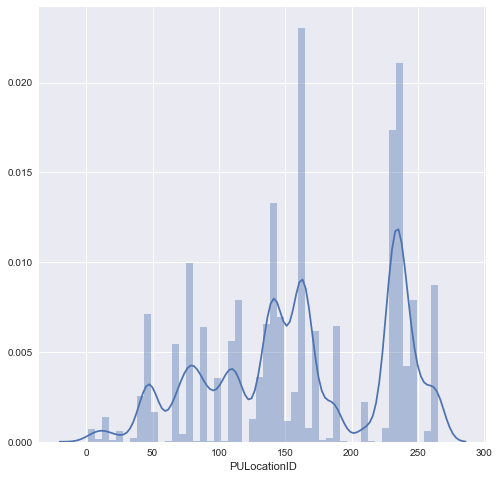

In [51]:
plt.figure(figsize=(8,8))
sns.distplot(tripDf['PULocationID'])

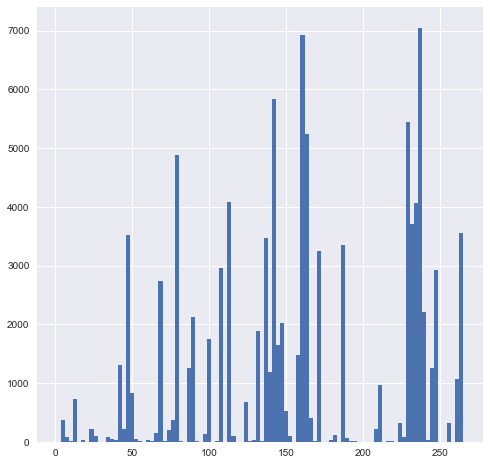

In [57]:
# this is just one block of the DF 
plt.figure(figsize=(8,8))
plt.hist(tripDf['PULocationID'], bins=100);

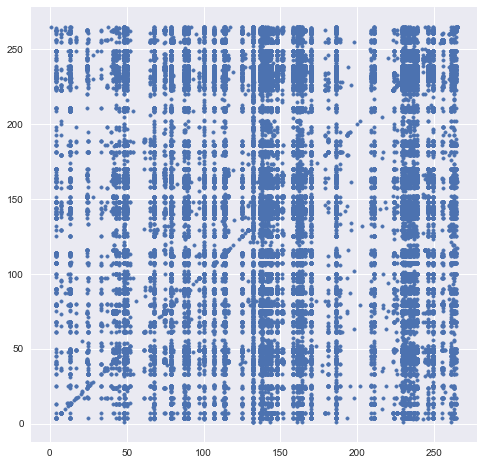

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(tripDf['PULocationID'], tripDf['DOLocationID'], marker='.')
plt.show()

### Viualize graph 

In [142]:
Gnx = nx.read_edgelist("uniqueEdges_Unweighted_yellow.txt", nodetype=int, create_using=nx.DiGraph())

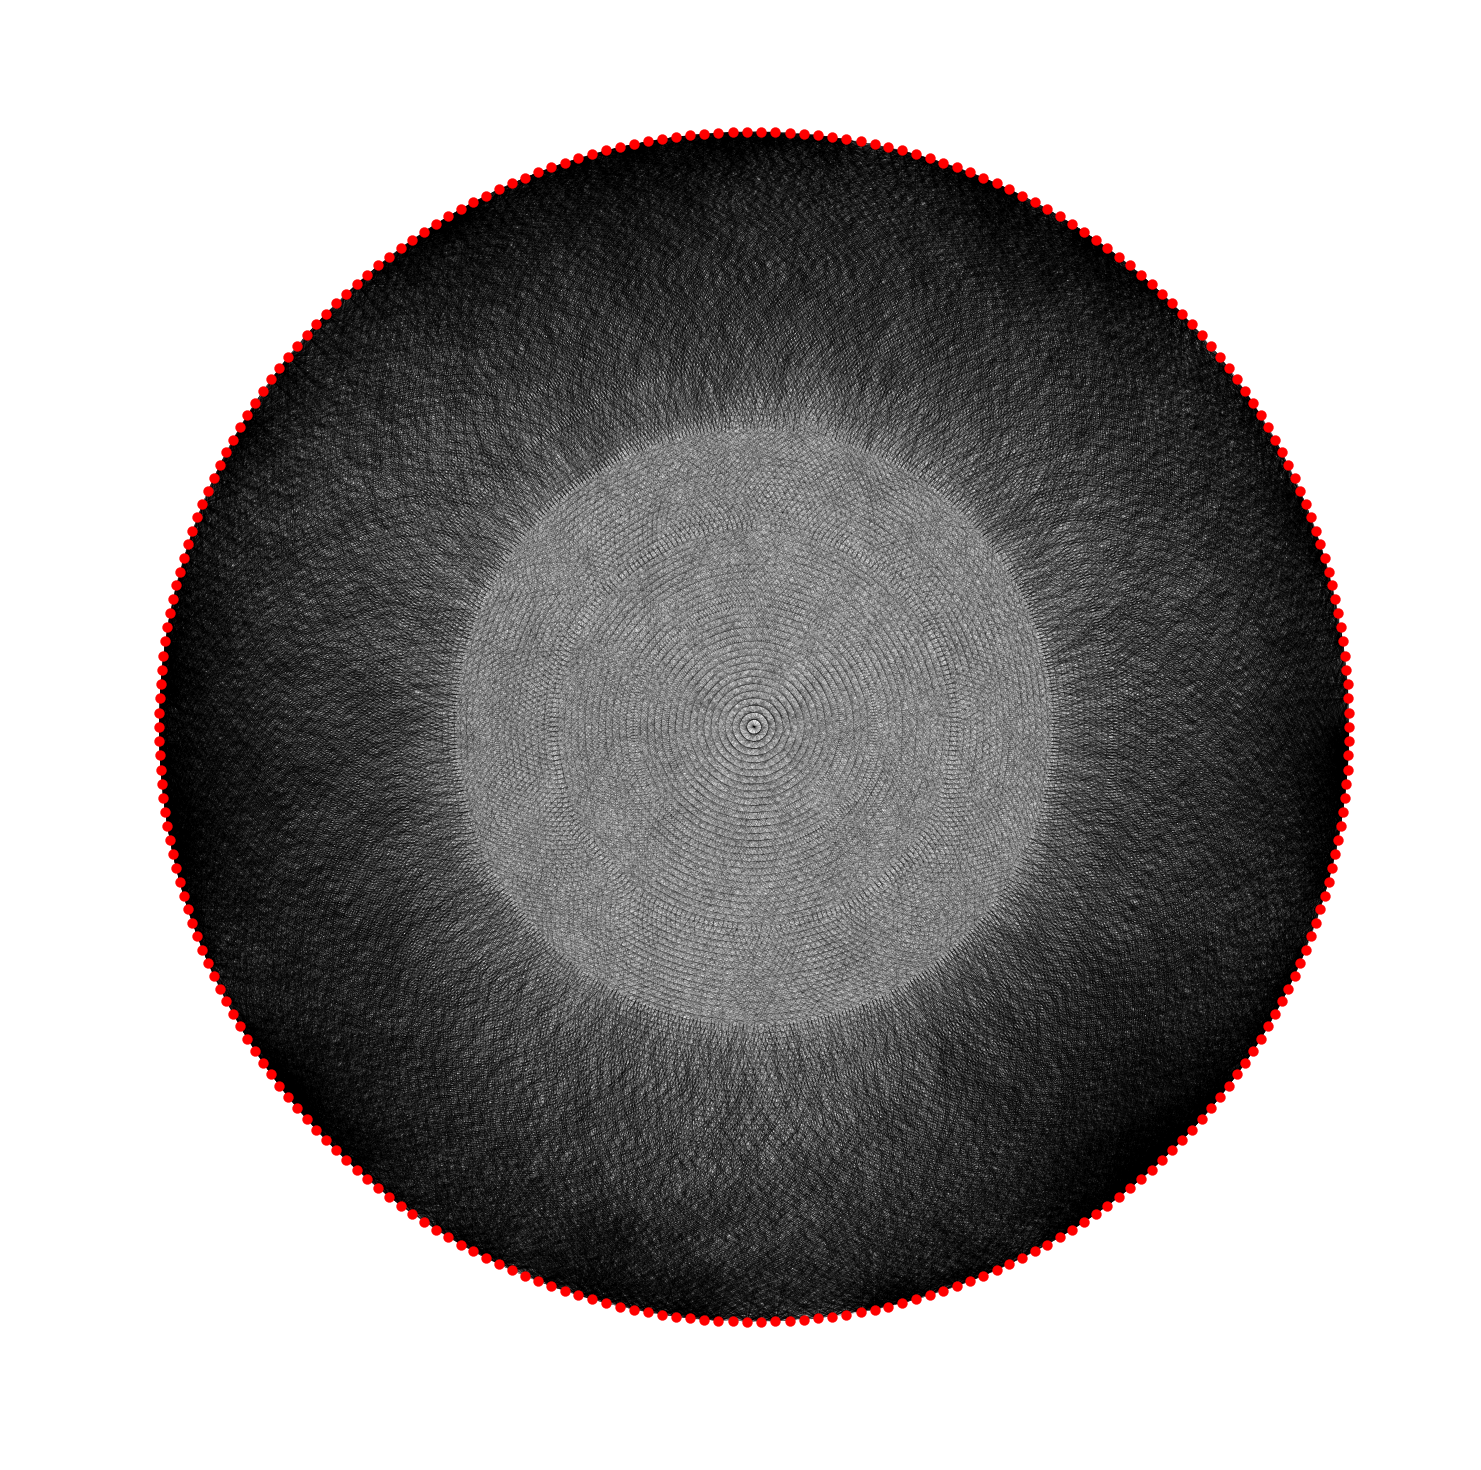

In [144]:
nx.draw_circular(Gnx,  node_size=100, width=0.04)
plt.savefig("unweighted_graph_Y16_full.png") 
plt.show() # display

In [138]:
del(Gnx)

- This grpah is unweighted 
- Further all the data was parsed to form this graph 

In [140]:
### Viualize weighted graph 

[Groupby question](http://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe)

In [83]:
# df1 = tripDf.groupby(['PULocationID','DOLocationID']).size()
df1 = tripDf.groupby(['PULocationID','DOLocationID']).size().reset_index(name='count')
df1.head()

PULocationID  DOLocationID  count
0             1           265      1
1             4             4     10
2             4             7      1
3             4            13      2
4             4            25      2

In [84]:
df1.tail()

PULocationID  DOLocationID  count
7319           264           265      6
7320           265           117      1
7321           265           161      1
7322           265           162      1
7323           265           265     43

In [85]:
df1.describe()

PULocationID  DOLocationID        count
count   7324.000000   7324.000000  7324.000000
mean     149.527307    141.323730    13.653741
std       72.290430     77.624095    33.067425
min        1.000000      1.000000     1.000000
25%       90.000000     74.000000     1.000000
50%      144.000000    143.000000     3.000000
75%      229.000000    220.000000    12.000000
max      265.000000    265.000000  1590.000000

In [86]:
df1.describe()
df1.head()

PULocationID  DOLocationID  count
0             1           265      1
1             4             4     10
2             4             7      1
3             4            13      2
4             4            25      2

In [88]:
import networkx as nx

In [ ]:
print df1.columns
print df1[:5]

In [109]:
for index, row in df1.iterrows():
    if index > 5:
        break
    else:
        print index, row['PULocationID'], row['PULocationID'], row['PULocationID']]

0 1 265 265
1 4 4 4
2 4 7 7
3 4 13 13
4 4 25 25
5 4 33 33


In [111]:
G=nx.Graph()
for index, row in df1.iterrows():
    G.add_edge(row['PULocationID'],row['DOLocationID'],weight=row['count'])

In [126]:
edgewidth = [ d['weight']/50. for (u,v,d) in G.edges(data=True)]

In [129]:
print "Number of nodes: %d" % G.number_of_nodes()
print "Number of edges: %d" % G.number_of_edges() 
# print "Number of selfloops: %d" % G.number_of_selfloops()

Number of nodes: 247
Number of edges: 5499


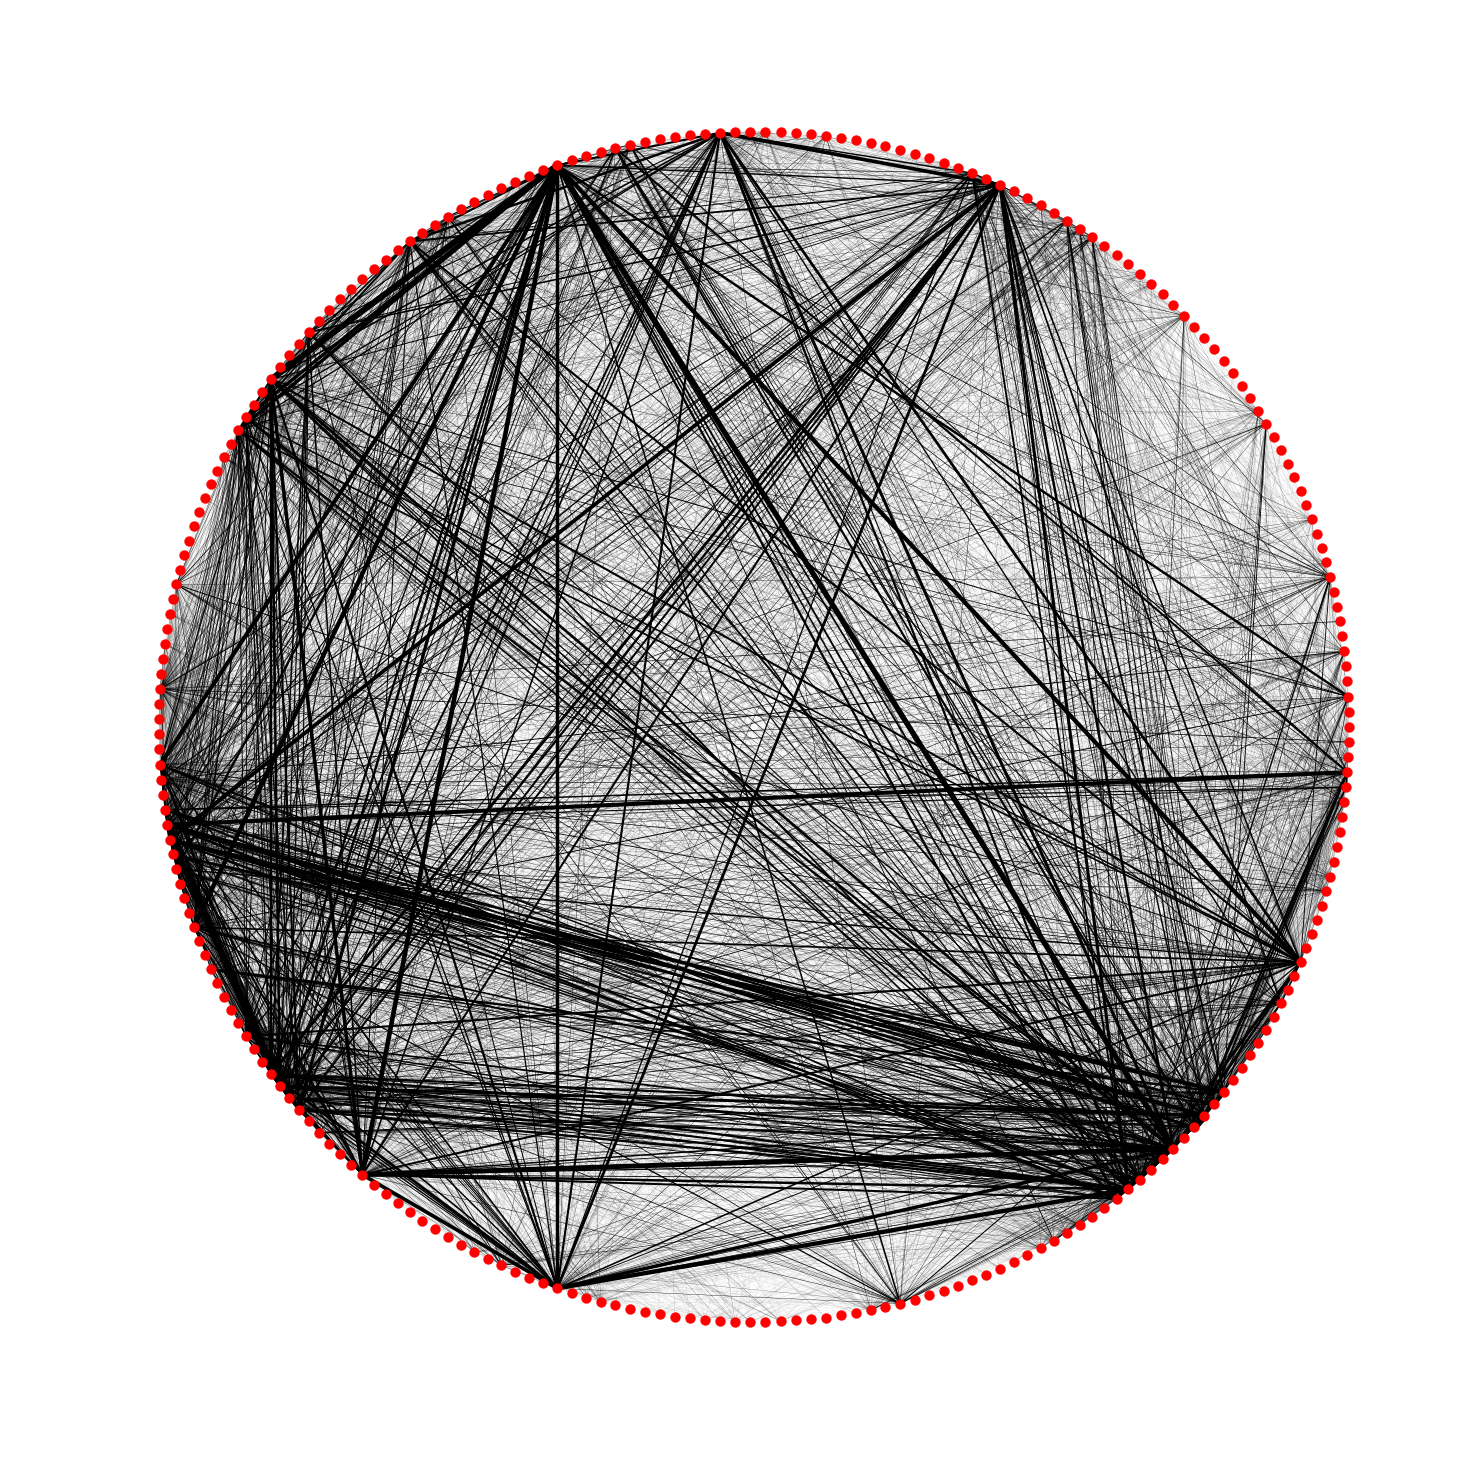

In [145]:
nx.draw_circular(G, node_size=100, width=edgewidth);
plt.savefig("weighted_graph_Y16_partial.png") 
plt.show() # display

- This graph is weighted 
- Further not all the data was parsed to form this graph 
- the dataframe manipulation needs to be parsed better 

### Thank You! 